In [28]:
# Calcula el onset en la Cuenca del Valle
# de México con información del CPC NOAA.

import os

import pandas as pd
import numpy as np

import xarray as xr

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

# Permite ajustar losva lores de todas las gráficas
#params = {"ytick.color" : "w",
#          "xtick.color" : "w",
#          "axes.labelcolor" : "w",
#          "axes.edgecolor" : "w",
#          "text.color": "w"}
#plt.rcParams.update(params)

In [36]:
path_d = "../results/onset/"
path_r = "../results/onset/graficas/"

if not os.path.exists(path_r):
    os.mkdir(path_r)

CPC = pd.read_csv(path_d + "onset_CPC.csv",
    index_col = "Año")

CPC = CPC.iloc[2:]
CPC["Cuenca - Onset"] = CPC["Cuenca - Onset"].apply(
    lambda x: pd.to_datetime(x))
CPC["Cuenca - Onset"] = CPC["Cuenca - Onset"].apply(
    lambda x: x.dayofyear)
CPC["Cuenca - Withdrawal"] = CPC["Cuenca - Withdrawal"].apply(
    lambda x: pd.to_datetime(x))
CPC["Cuenca - Withdrawal"] = CPC["Cuenca - Withdrawal"].apply(
    lambda x: x.dayofyear)

CHIRPS = pd.read_csv(path_d + "onset_CHIRPS.csv",
    index_col = "Año")

CHIRPS["Cuenca - Onset"] = CHIRPS["Cuenca - Onset"].apply(
    lambda x: pd.to_datetime(x))
CHIRPS["Cuenca - Onset"] = CHIRPS["Cuenca - Onset"].apply(
    lambda x: x.dayofyear)
CHIRPS["Cuenca - Withdrawal"] = CHIRPS["Cuenca - Withdrawal"].apply(
    lambda x: pd.to_datetime(x))
CHIRPS["Cuenca - Withdrawal"] = CHIRPS["Cuenca - Withdrawal"].apply(
    lambda x: x.dayofyear)

Onset correlation: 0.729
Withdrawal correlation: 0.933


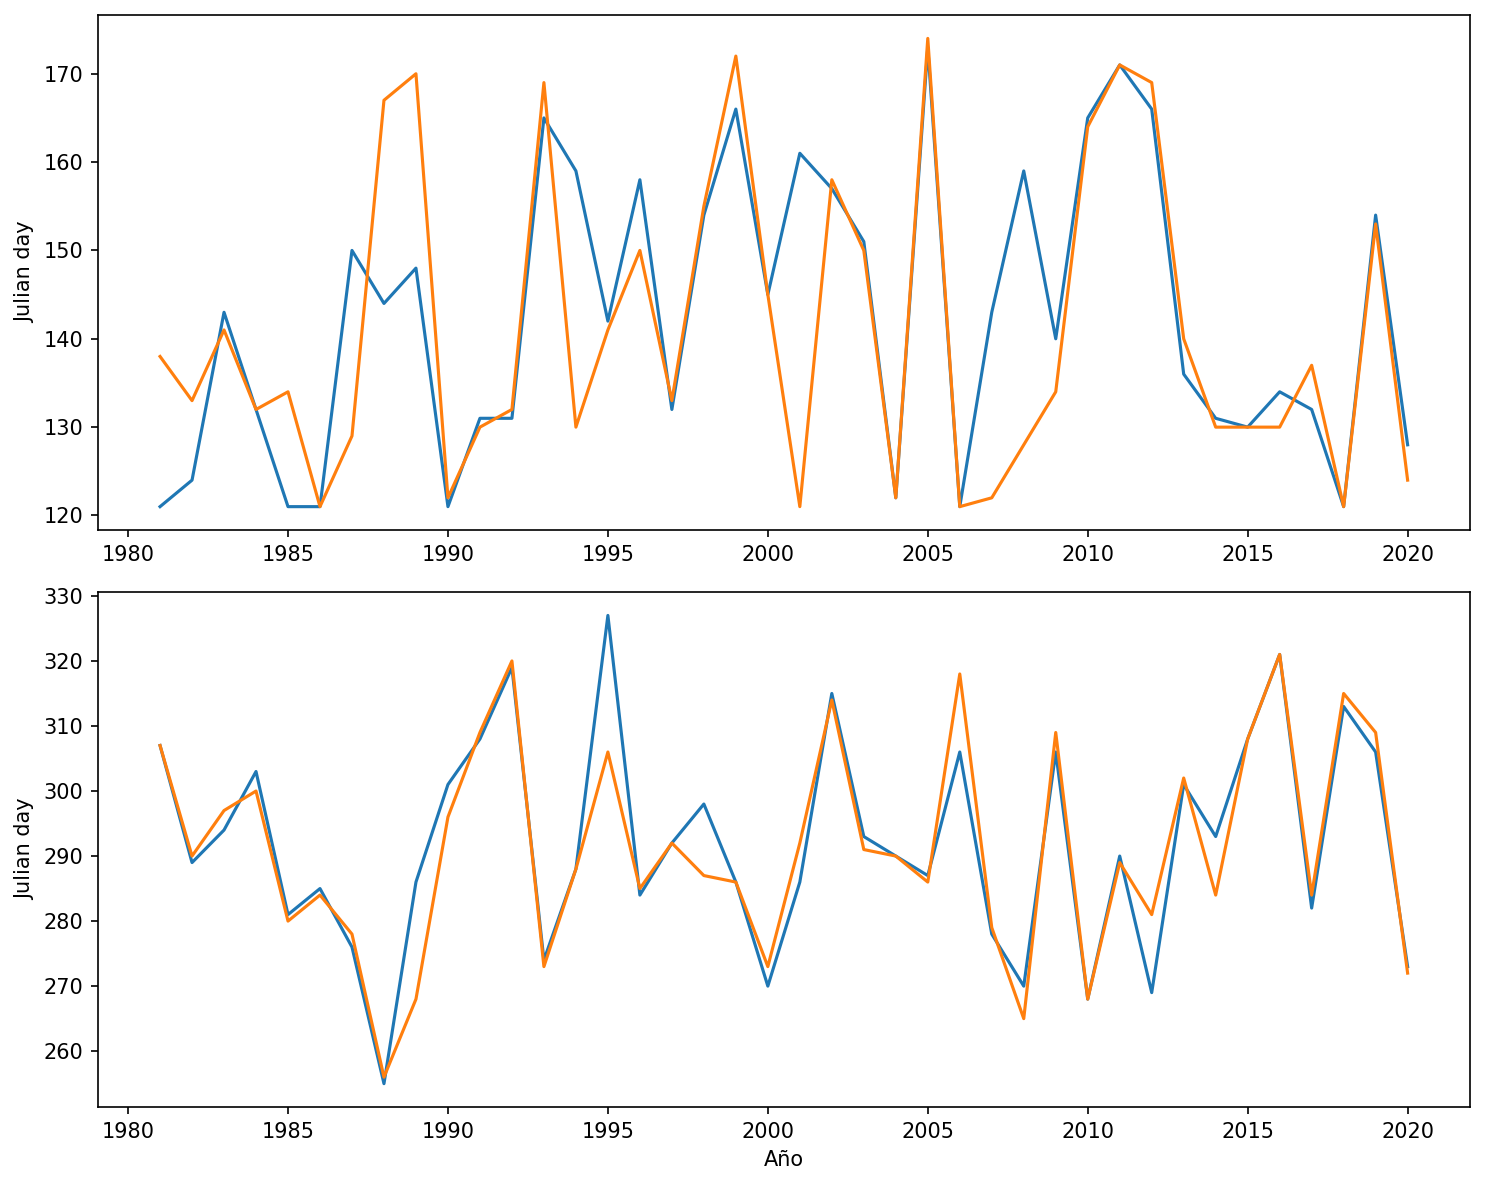

In [38]:
fig, axes = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

CPC["Cuenca - Onset"].plot(ax = axes[0])
CHIRPS["Cuenca - Onset"].plot(ax = axes[0])

CPC["Cuenca - Withdrawal"].plot(ax = axes[1])
CHIRPS["Cuenca - Withdrawal"].plot(ax = axes[1])

axes[0].set_ylabel("Julian day")
axes[1].set_ylabel("Julian day")

axes[0].set_xlabel("")

corr = []
corr.append( CPC["Cuenca - Onset"].corr(
    CHIRPS["Cuenca - Onset"] ) )
corr.append( CPC["Cuenca - Withdrawal"].corr(
    CHIRPS["Cuenca - Withdrawal"] ) )

print(f"Onset correlation: {corr[0]:.3f}")
print(f"Withdrawal correlation: {corr[1]:.3f}")

# Separación adecuada entre gráficas.
fig.tight_layout()

# Guardamos el archivo.
fig.savefig(path_r + "comparacion_3.png")